In [1]:
import numpy as np
from GaussianClassifier import BayesClassifier, NaiveBayesClassifier
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

def gaussian_sample(size, dim, mu, A):
	"""
	:param size: sample size
	:param dim: dimension of each sample
	:param mu: mean of each dimension
	:param A: dim by dim transformation matrix applied on multivariate N(0,1)
	"""
	X = np.zeros((size, dim))
	for d in range(dim):
		X[:,d] = np.random.normal(0, 1, size)
	X = np.dot(X, A)
	X += mu
	return X


# prepare training set
dim = 2
sample_size_list = [200,200]
mu_list = [[5,2],[-3,4]]
A_list = [[[1,0],[4,3]],
        [[1,-5],[3,-2]]]

X_by_class = {}
X = np.array([])
T = np.array([])
target = 0
X = np.zeros((1,dim))
T = np.array([])
for sample_size, mu, A in zip(sample_size_list,mu_list,A_list):
    x_k = gaussian_sample(sample_size, dim, mu, A)
    X_by_class[target] = x_k
    X = np.append(X, x_k, axis=0)
    T = np.append(T, np.ones(sample_size)*target)
    target+=1
X = X[1:,:]

# train classifier [compare different classifiers]

clr1 = NaiveBayesClassifier(X, T)
clr2 = BayesClassifier(X, T)

clr1.train()
clr2.train()

In [19]:
# predict in a grid
grid_start = -25
grid_end = 25
grid_size = 30

xv = np.linspace(grid_start,grid_end,grid_size)
yv = np.linspace(grid_start,grid_end,grid_size)
X,Y = np.meshgrid(xv,yv)
XX = np.array([X.flatten(),Y.flatten()]).T

YY1 = clr1.predict_all(XX)
YY2 = clr2.predict_all(XX)

predicts1,predicts2 = {},{}
joints1,joints2 = clr1.joint_all(XX), clr2.joint_all(XX)
for i, (y1, y2) in enumerate(zip(YY1,YY2)):
    if y1 not in predicts1:
        predicts1[y1]=np.empty((0, 2))
    if y2 not in predicts2:
        predicts2[y2]=np.empty((0, 2))
    predicts1[y1] = np.append(predicts1[y1],[XX[i]],axis=0)
    predicts2[y2] = np.append(predicts2[y2],[XX[i]],axis=0)
                        

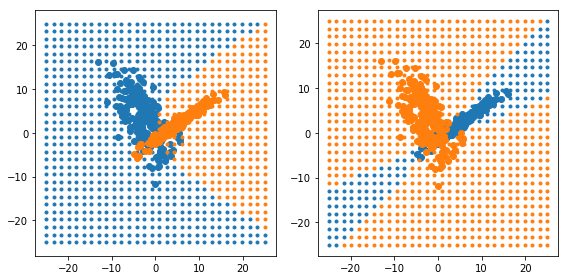

In [3]:
# plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

col = itertools.cycle(('C0','C1'))

for y in predicts1:
    c = next(col)
    ax1.plot(predicts1[y][:,0],predicts1[y][:,1], linestyle='', marker='.', color=c)
    ax1.plot(X_by_class[y][:,0], X_by_class[y][:,1], linestyle='', marker='o', color=c)

for y in predicts2:
    c = next(col)
    ax2.plot(predicts2[y][:,0],predicts2[y][:,1], linestyle='', marker='.', color=c)
    ax2.plot(X_by_class[y][:,0], X_by_class[y][:,1], linestyle='', marker='o', color=c)
    
ax1.axis('equal')
fig.tight_layout()

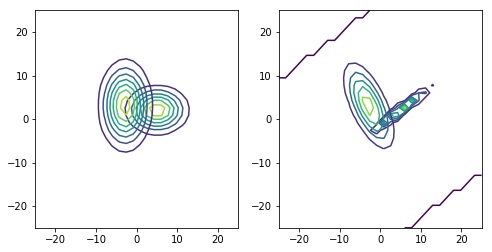

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

col = itertools.cycle(('C0','C1'))

for y in joints1:
    c = next(col)
    ax1.contour(X,Y,joints1[y].reshape(X.shape[0],X.shape[0]))
    #ax1.plot(X_by_class[y][:,0], X_by_class[y][:,1], linestyle='', marker='o', color=c)
for y in joints2:
    c = next(col)
    ax2.contour(X,Y,joints2[y].reshape(X.shape[0],X.shape[0]))
    #ax2.plot(X_by_class[y][:,0], X_by_class[y][:,1], linestyle='', marker='o', color=c)